# AVL

Реализовать класс AVL, который будет представлять собой avl-дерево. Поддержать следующие операции:

* вставка
* удаление
* поиск

Тесты продолжаем писать. 

# Import

In [2]:
import os

while os.getcwd().split("/")[-1] != "algorithms_python":
    os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
from typing import Any, List, Optional

# Treenode

In [ ]:
class TreeNode:
    """Нода для AVL-дерева"""

    def __init__(
        self,
        value: Any,
        left: Optional["TreeNode"] = None,
        right: Optional["TreeNode"] = None,
        height: int = 1
    ):
        self.value = value
        self.left = left
        self.right = right
        self.height = height  # высота поддерева с корнем в этой ноде

    def display(self):
        """Красивая отрисовка дерева."""
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)

    def _display_aux(self):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.right is None and self.left is None:
            line = "%s(%d)" % (self.value, self.height)
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux()
            s = "%s(%d)" % (self.value, self.height)
            u = len(s)
            first_line = (x + 1) * " " + (n - x - 1) * "_" + s
            second_line = x * " " + "/" + (n - x - 1 + u) * " "
            shifted_lines = [line + u * " " for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux()
            s = "%s(%d)" % (self.value, self.height)
            u = len(s)
            first_line = s + x * "_" + (n - x) * " "
            second_line = (u + x) * " " + "\\" + (n - x - 1) * " "
            shifted_lines = [u * " " + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.left._display_aux()
        right, m, q, y = self.right._display_aux()
        s = "%s(%d)" % (self.value, self.height)
        u = len(s)
        first_line = (x + 1) * " " + (n - x - 1) * "_" + s + y * "_" + (m - y) * " "
        second_line = (
            x * " " + "/" + (n - x - 1 + u + y) * " " + "\\" + (m - y - 1) * " "
        )
        if p < q:
            left += [n * " "] * (q - p)
        elif q < p:
            right += [m * " "] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * " " + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2

# AVL

Можно было бы отнаследоваться от BST из прошлого задания, но там есть ряд своих проблем, поэтому просто пересоздал класс AVL

повороты по логике [отсюда](https://ru.hexlet.io/courses/algorithms-trees/lessons/balancing/theory_unit) реализовывал

In [39]:
class AVL:
    def __init__(self, root: Optional[TreeNode] = None):
        self.root = root

    def _get_height(self, node: Optional[TreeNode]) -> int:
        if node is None:
            return 0
        return node.height

    def _get_balance(self, node: Optional[TreeNode]) -> int:
        if node is None:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def _update_height(self, node: TreeNode) -> None:
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))

    def _rotate_right(self, root: TreeNode) -> TreeNode:
        future_root = root.left
        right_subtree = future_root.right

        # поворот
        future_root.right = root
        root.left = right_subtree

        self._update_height(root)
        self._update_height(future_root)

        return future_root

    def _rotate_left(self, root: TreeNode) -> TreeNode:
        future_root = root.right
        left_subtree = future_root.left

        # поворот
        future_root.left = root
        root.right = left_subtree

        self._update_height(root)
        self._update_height(future_root)

        return future_root

    def _balance_subtree(self, node: TreeNode) -> TreeNode:
        self._update_height(node)

        balance = self._get_balance(node)

        if balance > 1 and self._get_balance(node.left) >= 0:
            return self._rotate_right(node)

        if balance > 1 and self._get_balance(node.left) < 0:
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)

        if balance < -1 and self._get_balance(node.right) <= 0:
            return self._rotate_left(node)

        if balance < -1 and self._get_balance(node.right) > 0:
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        return node

    def insert(self, value: Any) -> None:
        self.root = self._insert_recur(self.root, value)

    def _insert_recur(self, node: Optional[TreeNode], value: Any) -> TreeNode:
        if node is None:
            return TreeNode(value)
        
        if value < node.value:
            node.left = self._insert_recur(node.left, value)
        elif value > node.value:
            node.right = self._insert_recur(node.right, value)
        else:
            return node  # игнорим дубликаты

        # балансируем все поддеревья  
        return self._balance_subtree(node)

    def delete(self, value: Any) -> None:
        self.root = self._delete_recur(self.root, value)

    def _delete_recur(self, node: Optional[TreeNode], value: Any) -> Optional[TreeNode]:
        if node is None:
            return node

        if value < node.value:
            node.left = self._delete_recur(node.left, value)
        elif value > node.value:
            node.right = self._delete_recur(node.right, value)
        else:
            # нода равна значению 
            if node.left is None and node.right is not None:
                return node.right
            elif node.left is not None and node.right is None:
                return node.left
            elif node.left is None and node.right is None:
                return None
            else:
                # нода с двумя детьми: получаем минимальный элемент из правого поддерева
                temp = self._min_value_node(node.right)
                node.value = temp.value
                node.right = self._delete_recur(node.right, temp.value)

        # if node is None:
        #     return node

        # балансируем все поддеревья 
        return self._balance_subtree(node)

    def _min_value_node(self, node: TreeNode) -> TreeNode:
        if node.left is None:
            return node
        return self._min_value_node(node.left)

    def search(self, value: Any) -> Optional[TreeNode]:
        """Поиск значения в дереве"""
        return self._search_recur(self.root, value)

    def _search_recur(self, node: Optional[TreeNode], value: Any) -> Optional[TreeNode]:
        """Рекурсивный поиск ноды с заданным значением"""
        if node is None:
            return None
        if value == node.value:
            return node
        elif value < node.value:
            return self._search_recur(node.left, value)
        else:
            return self._search_recur(node.right, value)
        
    def is_balanced(self) -> bool:
        return self._is_balanced_recur(self.root)
    
    def _is_balanced_recur(self, node: Optional[TreeNode]) -> bool:
        if node is None:
            return True
        
        balance = self._get_balance(node)
        if balance < -1 or balance > 1:
            return False
        
        return (self._is_balanced_recur(node.left) and 
                self._is_balanced_recur(node.right))


    def display(self):
        """Отрисовка дерева"""
        if self.root is None:
            print("Empty AVL Tree")
        else:
            self.root.display()

# CHECK

In [35]:
from bintrees import AVLTree
from graphviz import Digraph

def avl_to_graphviz(avl, filename="avl_tree"):
    dot = Digraph(comment='AVL Tree')
    
    def add_nodes_edges(node):
        if node is None:
            return
        
        # Добавляем текущий узел
        dot.node(str(node.key), f"{node.key}\\n{node.value}")
        
        # Добавляем левого ребенка и связь
        if node.left is not None:
            dot.edge(str(node.key), str(node.left.key), label="L")
            add_nodes_edges(node.left)
            
        # Добавляем правого ребенка и связь  
        if node.right is not None:
            dot.edge(str(node.key), str(node.right.key), label="R")
            add_nodes_edges(node.right)
    
    add_nodes_edges(avl._root)
    dot.render(filename)
    return dot

In [40]:
avl = AVL()
values = list(range(10))
for val in values:
    avl.insert(val)
print(avl.is_balanced())
avl.display()

True
  _3___   
 /     \  
 1    _7  
/ \  /  \ 
0 2  5  8 
    / \  \
    4 6  9


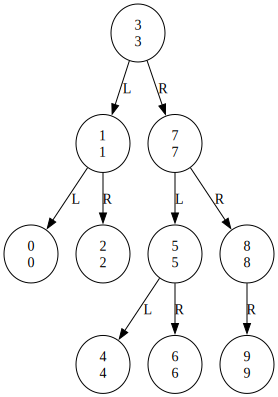

In [36]:
avl = AVLTree()
values = list(range(10))

for val in values:
    avl.insert(val, val)

avl_to_graphviz(avl)

In [41]:
avl = AVL()
values = [10, 20, 30, 40, 50, 25]
for val in values:
    avl.insert(val)
print(avl.is_balanced())
avl.display()

True
    __30_   
   /     \  
  20_   40_ 
 /   \     \
10  25    50


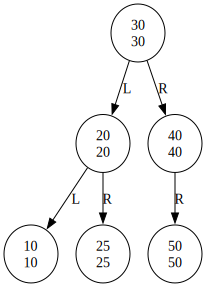

In [38]:
avl = AVLTree()
values = [10, 20, 30, 40, 50, 25]

for val in values:
    avl.insert(val, val)

avl_to_graphviz(avl)